In [1]:
import pandas as pd
import requests
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

import datetime as dt
plt.style.use('fivethirtyeight')


API_key = "ed733879878dc4eefc0f1f08664391a3"


ticker = "RTN"

In [2]:
# pulling the data for the company

url2 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url2 = url2 + ticker + "?period=10&type=rsi" + "&apikey=" + API_key

indicator = requests.get(query_url2).json()

print(indicator)

[{'date': '2020-04-02', 'open': 120.65, 'high': 126.85, 'low': 115.0, 'close': 116.96, 'volume': 9360245.0, 'rsi': 33.23046602398287}, {'date': '2020-04-01', 'open': 123.94, 'high': 125.38, 'low': 120.18, 'close': 122.43, 'volume': 5086116.0, 'rsi': 35.4769228200093}, {'date': '2020-03-31', 'open': 140.8, 'high': 140.96, 'low': 130.03, 'close': 131.15, 'volume': 4404051.0, 'rsi': 39.28747025288316}, {'date': '2020-03-30', 'open': 140.02, 'high': 142.54, 'low': 133.43, 'close': 141.21, 'volume': 3766313.0, 'rsi': 44.218906623435856}, {'date': '2020-03-27', 'open': 146.9, 'high': 149.75, 'low': 140.27, 'close': 142.02, 'volume': 3552975.0, 'rsi': 44.624812482738015}, {'date': '2020-03-26', 'open': 150.16, 'high': 157.97, 'low': 146.42, 'close': 155.2, 'volume': 3665500.0, 'rsi': 51.55529546799083}, {'date': '2020-03-25', 'open': 135.99, 'high': 152.99, 'low': 131.1, 'close': 144.78, 'volume': 5191800.0, 'rsi': 45.53684467295913}, {'date': '2020-03-24', 'open': 124.5, 'high': 134.92, 'low

In [3]:
#creating DataFrame

indicator_df = pd.DataFrame(indicator)
indicator_df = indicator_df.sort_values(by="date")
indicator_df

,date,open,high,low,close,volume,rsi
1101,2015-11-16,117.88,122.55,117.88,122.11,3018500.0,0.000000
1100,2015-11-17,122.88,124.53,121.81,123.26,2648700.0,100.000000
1099,2015-11-18,123.86,124.29,122.10,123.95,1740300.0,100.000000
1098,2015-11-19,125.64,126.65,124.99,126.00,1675600.0,100.000000
1097,2015-11-20,126.75,128.20,126.60,127.04,1622600.0,100.000000
...,...,...,...,...,...,...,...
4,2020-03-27,146.90,149.75,140.27,142.02,3552975.0,44.624812
3,2020-03-30,140.02,142.54,133.43,141.21,3766313.0,44.218907
2,2020-03-31,140.80,140.96,130.03,131.15,4404051.0,39.287470
1,2020-04-01,123.94,125.38,120.18,122.43,5086116.0,35.476923


In [4]:
# pulling the market data (SPY)

url3 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url3 = url3 + "SPY?period=10&type=rsi" + "&apikey=" + API_key

spy = requests.get(query_url3).json()

print(spy)


[{'date': '2020-11-13', 'open': 355.269989, 'high': 358.899994, 'low': 354.709991, 'close': 358.100006, 'volume': 62892200.0, 'rsi': 67.46742883715231}, {'date': '2020-11-12', 'open': 355.579987, 'high': 356.720001, 'low': 351.26001, 'close': 353.209991, 'volume': 67546200.0, 'rsi': 62.529124440155556}, {'date': '2020-11-11', 'open': 356.399994, 'high': 357.559998, 'low': 355.059998, 'close': 356.670013, 'volume': 58649000.0, 'rsi': 69.22032896995137}, {'date': '2020-11-10', 'open': 353.48999, 'high': 355.179993, 'low': 350.51001, 'close': 354.040009, 'volume': 85552000.0, 'rsi': 66.78911933645477}, {'date': '2020-11-09', 'open': 363.970001, 'high': 364.380005, 'low': 354.059998, 'close': 354.559998, 'volume': 172304200.0, 'rsi': 67.74123964999349}, {'date': '2020-11-06', 'open': 349.929993, 'high': 351.51001, 'low': 347.649994, 'close': 350.160004, 'volume': 74973000.0, 'rsi': 63.81258237762847}, {'date': '2020-11-05', 'open': 349.23999, 'high': 352.190002, 'low': 348.859985, 'close':

In [5]:
#creating DataFrame

spy_df = pd.DataFrame(spy)
spy_df = spy_df.sort_values(by='date')
spy_df

,date,open,high,low,close,volume,rsi
1258,2015-11-16,183.822800,187.192800,183.682800,187.122800,117645200.0,0.000000
1257,2015-11-17,187.506300,188.556300,186.396300,186.986300,121123700.0,0.000000
1256,2015-11-18,187.263000,190.123000,187.213000,189.953000,121342500.0,96.023693
1255,2015-11-19,189.829200,190.289200,189.439200,189.789200,88220500.0,90.681787
1254,2015-11-20,190.620800,191.290800,190.030800,190.480800,94011500.0,92.610373
...,...,...,...,...,...,...,...
4,2020-11-09,363.970001,364.380005,354.059998,354.559998,172304200.0,67.741240
3,2020-11-10,353.489990,355.179993,350.510010,354.040009,85552000.0,66.789119
2,2020-11-11,356.399994,357.559998,355.059998,356.670013,58649000.0,69.220329
1,2020-11-12,355.579987,356.720001,351.260010,353.209991,67546200.0,62.529124


In [6]:
# pulling VIX data

url4 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url4 = url4 + "UVXY?period=10&type=rsi" + "&apikey=" + API_key

vix = requests.get(query_url4).json()

print(vix)


[{'date': '2020-11-13', 'open': 13.66, 'high': 13.66, 'low': 12.73, 'close': 13.05, 'volume': 43994400.0, 'rsi': 32.79737897633361}, {'date': '2020-11-12', 'open': 13.3, 'high': 14.82, 'low': 13.09, 'close': 14.37, 'volume': 68251200.0, 'rsi': 37.314849922717535}, {'date': '2020-11-11', 'open': 13.18, 'high': 13.44, 'low': 12.64, 'close': 13.06, 'volume': 34220400.0, 'rsi': 28.52110338630687}, {'date': '2020-11-10', 'open': 13.63, 'high': 14.4, 'low': 13.45, 'close': 13.49, 'volume': 36231600.0, 'rsi': 29.754200343357567}, {'date': '2020-11-09', 'open': 13.14, 'high': 14.18, 'low': 12.18, 'close': 14.18, 'volume': 54605600.0, 'rsi': 31.73573955648732}, {'date': '2020-11-06', 'open': 16.01, 'high': 16.08, 'low': 14.63, 'close': 14.67, 'volume': 53209600.0, 'rsi': 33.1465959863587}, {'date': '2020-11-05', 'open': 15.89, 'high': 16.530001, 'low': 15.65, 'close': 16.209999, 'volume': 33461500.0, 'rsi': 37.91423499083043}, {'date': '2020-11-04', 'open': 18.0, 'high': 18.049999, 'low': 16.5,

In [7]:
#creating DataFrame

vix_df = pd.DataFrame(vix)
vix_df = vix_df.sort_values(by='date')
vix_df

,date,open,high,low,close,volume,rsi
1258,2015-11-16,18625.00,18900.00,14840.00,14960.00,65800.0,0.000000
1257,2015-11-17,14560.00,17125.00,14430.00,16540.00,71500.0,100.000000
1256,2015-11-18,15945.00,16030.00,14400.00,14460.00,51100.0,40.605368
1255,2015-11-19,14740.00,15830.00,14600.00,15450.00,40700.0,54.802260
1254,2015-11-20,14510.00,14715.00,14075.00,14445.00,43700.0,43.164674
...,...,...,...,...,...,...,...
4,2020-11-09,13.14,14.18,12.18,14.18,54605600.0,31.735740
3,2020-11-10,13.63,14.40,13.45,13.49,36231600.0,29.754200
2,2020-11-11,13.18,13.44,12.64,13.06,34220400.0,28.521103
1,2020-11-12,13.30,14.82,13.09,14.37,68251200.0,37.314850


In [8]:
#merging data

merge_df = pd.merge(indicator_df,spy_df, on="date", how="left", suffixes=("","_SPY"))
#merge_df = merge_df[merge_df["date"] > "2018-12-31"]
merge_df

,date,open,high,low,close,volume,rsi,open_SPY,high_SPY,low_SPY,close_SPY,volume_SPY,rsi_SPY
0,2015-11-16,117.88,122.55,117.88,122.11,3018500.0,0.000000,183.8228,187.1928,183.6828,187.1228,117645200.0,0.000000
1,2015-11-17,122.88,124.53,121.81,123.26,2648700.0,100.000000,187.5063,188.5563,186.3963,186.9863,121123700.0,0.000000
2,2015-11-18,123.86,124.29,122.10,123.95,1740300.0,100.000000,187.2630,190.1230,187.2130,189.9530,121342500.0,96.023693
3,2015-11-19,125.64,126.65,124.99,126.00,1675600.0,100.000000,189.8292,190.2892,189.4392,189.7892,88220500.0,90.681787
4,2015-11-20,126.75,128.20,126.60,127.04,1622600.0,100.000000,190.6208,191.2908,190.0308,190.4808,94011500.0,92.610373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,2020-03-27,146.90,149.75,140.27,142.02,3552975.0,44.624812,252.1597,259.6997,249.9397,252.3097,224341200.0,45.965327
1098,2020-03-30,140.02,142.54,133.43,141.21,3766313.0,44.218907,254.5536,261.2836,252.3836,260.5036,171369500.0,50.014368
1099,2020-03-31,140.80,140.96,130.03,131.15,4404051.0,39.287470,259.4307,262.2007,255.0907,256.6207,194881100.0,48.115950
1100,2020-04-01,123.94,125.38,120.18,122.43,5086116.0,35.476923,246.9015,256.5815,242.8215,245.0715,189554600.0,42.752858


In [9]:
#merging data

merge_df2 = pd.merge(merge_df, vix_df, on = "date", how="left", suffixes=("", "_VIX"))
merge_df2.tail(60)

,date,open,high,low,close,volume,rsi,open_SPY,high_SPY,low_SPY,close_SPY,volume_SPY,rsi_SPY,open_VIX,high_VIX,low_VIX,close_VIX,volume_VIX,rsi_VIX
1042,2020-01-08,227.95,228.69,226.12,227.40,1900100.0,71.741458,319.6301,322.4701,319.3601,321.1401,68296000.0,67.558031,12.55,12.69,11.86,12.37,20932700.0,38.122007
1043,2020-01-09,227.00,228.78,227.00,228.65,1039800.0,74.218097,322.8276,323.3976,322.1876,323.3176,48473300.0,72.604101,11.87,12.08,11.66,11.68,13253200.0,32.725548
1044,2020-01-10,228.22,229.79,226.28,226.48,1477700.0,63.485712,323.9672,324.1372,321.8772,322.3872,53029300.0,67.611405,11.63,11.79,11.39,11.59,15723900.0,32.067661
1045,2020-01-13,227.06,228.00,226.12,227.15,1391300.0,65.211528,323.0444,324.6144,322.5744,324.6044,47086800.0,72.600378,11.40,11.56,11.11,11.13,10598500.0,28.781759
1046,2020-01-14,226.48,227.88,226.12,227.40,1171900.0,65.880120,324.1295,325.2795,323.4995,324.1095,62832800.0,69.928935,11.16,11.31,10.86,11.03,18930400.0,28.086597
1047,2020-01-15,228.00,229.93,227.01,229.41,1340900.0,70.879722,324.0019,325.6719,323.9119,324.8419,72056600.0,71.644595,11.01,11.07,10.84,10.97,13842300.0,27.641516
1048,2020-01-16,230.18,232.42,229.97,232.31,1235300.0,76.418963,326.3241,327.5441,326.0741,327.5441,54050300.0,77.019479,10.73,10.76,10.52,10.58,12446400.0,24.802859
1049,2020-01-17,232.47,233.48,231.21,231.34,1877700.0,71.373262,328.3136,328.7936,327.4636,328.5636,95846000.0,78.711138,10.56,10.91,10.54,10.62,12949300.0,25.672725
1050,2020-01-21,230.77,232.41,226.32,228.99,2478500.0,60.602119,327.5202,328.8002,327.4402,327.9202,77742400.0,74.847625,10.82,10.84,10.40,10.74,16445900.0,28.432326
1051,2020-01-22,228.98,231.86,228.23,229.41,2204600.0,61.748461,328.8598,329.5698,327.7898,327.9598,48914900.0,74.931773,10.45,10.86,10.44,10.83,13941100.0,30.580159


In [10]:
#splitting data to X values and dates

dataset_train = merge_df2
cols = list(dataset_train)[1:]

datelist_train = list(dataset_train['date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print(f"traindata shape = {dataset_train.shape}")
print(f"time stamps = {len(dataset_train)}")
print(f"features = {cols}")


traindata shape = (1102, 19)
time stamps = 1102
features = ['open', 'high', 'low', 'close', 'volume', 'rsi', 'open_SPY', 'high_SPY', 'low_SPY', 'close_SPY', 'volume_SPY', 'rsi_SPY', 'open_VIX', 'high_VIX', 'low_VIX', 'close_VIX', 'volume_VIX', 'rsi_VIX']


In [11]:
#changing X values to numpy

dataset_train = dataset_train[cols]
dataset_train = dataset_train.astype(float)
training_set = dataset_train.to_numpy()
training_set

array([[1.17880000e+02, 1.22550000e+02, 1.17880000e+02, ...,
        1.49600000e+04, 6.58000000e+04, 0.00000000e+00],
       [1.22880000e+02, 1.24530000e+02, 1.21810000e+02, ...,
        1.65400000e+04, 7.15000000e+04, 1.00000000e+02],
       [1.23860000e+02, 1.24290000e+02, 1.22100000e+02, ...,
        1.44600000e+04, 5.11000000e+04, 4.06053684e+01],
       ...,
       [1.40800000e+02, 1.40960000e+02, 1.30030000e+02, ...,
        5.85600000e+01, 1.27252000e+07, 4.84618156e+01],
       [1.23940000e+02, 1.25380000e+02, 1.20180000e+02, ...,
        6.59300000e+01, 9.18620000e+06, 5.29131499e+01],
       [1.20650000e+02, 1.26850000e+02, 1.15000000e+02, ...,
        6.04100000e+01, 1.15576000e+07, 4.93649439e+01]])

In [12]:
# Scaling data

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-1.77068472],
       [-1.60750539],
       [-1.57552224],
       ...,
       [-1.02267065],
       [-1.57291137],
       [-1.68028337]])

In [13]:
# Creating a data structure with timestamps and 1 output
X_train = []
y_train = []

n_future = 30   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (983, 90, 17).
y_train shape == (983, 1).


In [14]:
# Initializing the Neural Network based on LSTM
model = Sequential()
# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))
# Adding Dropout
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 64)            20992     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                3000      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 24,003
Trainable params: 24,003
Non-trainable params: 0
_________________________________________________________________


In [16]:
#training data
history = model.fit(X_train, y_train, shuffle=True, epochs=50, validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/50
4/4 [==============================] - 1s 226ms/step - loss: 0.4972 - val_loss: 0.8173
Epoch 2/50
4/4 [==============================] - 0s 70ms/step - loss: 0.1799 - val_loss: 0.8964
Epoch 3/50
4/4 [==============================] - 0s 71ms/step - loss: 0.1445 - val_loss: 0.9584
Epoch 4/50
4/4 [==============================] - 0s 70ms/step - loss: 0.1022 - val_loss: 1.0525
Epoch 5/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0934 - val_loss: 0.8544
Epoch 6/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0917 - val_loss: 1.0167
Epoch 7/50
4/4 [==============================] - 0s 66ms/step - loss: 0.0770 - val_loss: 1.1506
Epoch 8/50
4/4 [==============================] - 0s 71ms/step - loss: 0.0715 - val_loss: 1.2571
Epoch 9/50
4/4 [==============================] - 0s 75ms/step - loss: 0.0650 - val_loss: 1.2653
Epoch 10/50
4/4 [==============================] - 0s 68ms/step - loss: 0.0633 - val_loss: 1.1356
Epoch 11/50
4/4 [===========

In [17]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

# creating date information into timestamp format
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [18]:
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [19]:
# Inverse the predictions to original measurements

def datetime_to_timestamp(x):
    return dt.datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2016-09-15,139.194000
2016-09-16,139.107147
2016-09-19,139.392929


In [20]:
y_pred_future = sc_predict.inverse_transform(PREDICTIONS_FUTURE)

predictions_future = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
predictions_future

,Open
2020-04-02,5706.099121
2020-04-03,5712.319824
2020-04-04,5703.464844
2020-04-05,5710.196777
2020-04-06,5698.985840
2020-04-07,5703.036621
2020-04-08,5712.073730
2020-04-09,5714.678711
2020-04-10,5709.449707
2020-04-11,5715.057129


In [21]:
y_pred_train = sc_predict.inverse_transform(PREDICTION_TRAIN)

predictions_train = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))
predictions_train

,Open
2016-09-15,4437.197754
2016-09-16,4434.536621
2016-09-19,4443.293457
2016-09-20,4442.835449
2016-09-21,4440.927246
...,...
2020-03-27,5672.087891
2020-03-30,5675.006836
2020-03-31,5666.374512
2020-04-01,5670.939453


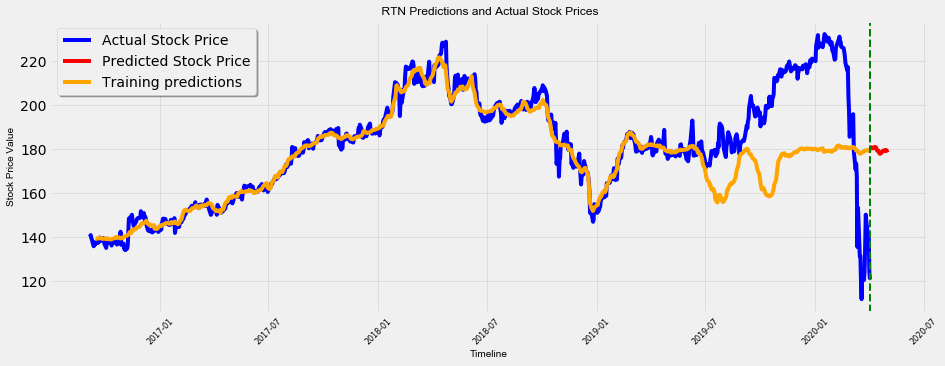

In [23]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2017-01-01' #there is a little bit of discrepancy because stock market is not open on weekends
length =  len(pd.DataFrame(datelist_train).loc[START_DATE_FOR_PLOTTING:])

plt.plot(datelist_train[-length:], dataset_train.iloc[-length:]['open'], color='b', label='Actual Stock Price')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.iloc[-length:].index, PREDICTION_TRAIN.iloc[-length:]['Open'], color='orange', label='Training predictions')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(' RTN Predictions and Actual Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()